First, we'll test out the Hermite Polynomial

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy 
import numpy.polynomial.hermite as Herm

In [2]:
m = 1
w = 1
hbar = 1

In [3]:
dx = 0.05
x_lim = 12
x = numpy.arange(-x_lim,x_lim,dx)

x will be an array of [-12,-11.5,...,12]
Next, defining Hermite Polynomial

In [4]:
def Hermite(x,n):
    xi = numpy.sqrt(m*w/hbar)*x
    herm_coeffs = numpy.zeros(n+1)
    herm_coeffs[n]=1
    return Herm.hermval(xi, herm_coeffs,)

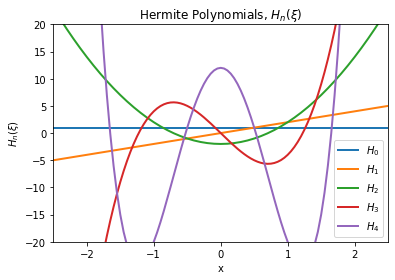

In [5]:
plt.figure()
plt.plot(x, Hermite(x,0), linewidth=2, label=r"$H_0$")
plt.plot(x, Hermite(x,1), linewidth=2, label=r"$H_1$")
plt.plot(x, Hermite(x,2), linewidth=2, label=r"$H_2$")
plt.plot(x, Hermite(x,3), linewidth=2, label=r"$H_3$")
plt.plot(x, Hermite(x,4), linewidth=2, label=r"$H_4$")

plt.xlim([-2.5,2.5])
plt.ylim([-20,20])

plt.xlabel("x")
plt.ylabel(r"$H_n(\xi)$")
plt.title(r"Hermite Polynomials, $H_n(\xi)$")
plt.legend()
plt.show()

Next is the code for psi_n of the quantum harmonic oscillator

In [6]:
import math

def stationary_states(x,n):
    xi = numpy.sqrt(m*w/hbar)*x
    prefactor = 1./math.sqrt(2.**n* math.factorial(n)) * (m*w/(numpy.pi*hbar))**(0.25)
    psi = prefactor*numpy.exp(-xi**2/2)*Hermite(x,n)
    return psi

#V = 0.5*m*(w**2)*(x**2)

In [7]:
stationary_states(x,1)

array([-6.85813577e-31, -1.24287244e-30, -2.24674457e-30, -4.05123501e-30,
       -7.28664660e-30, -1.30729754e-29, -2.33952439e-29, -4.17625535e-29,
       -7.43622936e-29, -1.32076242e-28, -2.33992940e-28, -4.13510802e-28,
       -7.28915100e-28, -1.28166033e-27, -2.24788855e-27, -3.93262349e-27,
       -6.86271000e-27, -1.19457806e-26, -2.07414422e-26, -3.59226874e-26,
       -6.20588980e-26, -1.06941086e-25, -1.83818971e-25, -3.15167332e-25,
       -5.39010345e-25, -9.19513186e-25, -1.56467337e-24, -2.65579287e-24,
       -4.49644620e-24, -7.59362600e-24, -1.27918546e-23, -2.14942472e-23,
       -3.60259372e-23, -6.02299580e-23, -1.00441679e-22, -1.67078048e-22,
       -2.77222677e-22, -4.58819578e-22, -7.57458518e-22, -1.24732431e-21,
       -2.04881825e-21, -3.35684191e-21, -5.48607371e-21, -8.94325420e-21,
       -1.45422827e-20, -2.35869916e-20, -3.81606148e-20, -6.15830079e-20,
       -9.91308971e-20, -1.59169429e-19, -2.54925124e-19, -4.07256339e-19,
       -6.48970824e-19, -

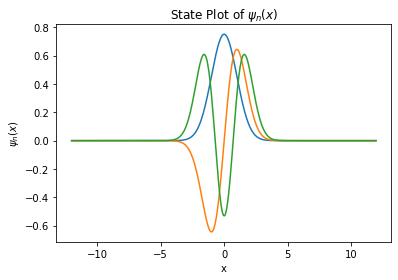

In [22]:
plt.figure()
plt.plot(x, stationary_states(x,0))
plt.plot(x, stationary_states(x,1))
plt.plot(x, stationary_states(x,2))
#plt.plot(x, stationary_states(x,3))
#plt.plot(x, stationary_states(x,4))

plt.xlabel("x")
plt.ylabel(r"$\psi_n(x)$")
plt.title(r"State Plot of $\psi_n(x)$")
plt.show()

Creating the Classical distribution

Text(0.5, 1.0, 'Classical Probability Density of a Harmonic Oscillator, $E_0$ to $E_3$')

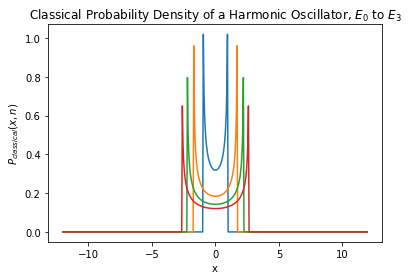

In [17]:
def classical_P(x,n):
    E = hbar*w*(n+0.5)
    x_max = numpy.sqrt(2*E/(m*w**2))
    classical_prob = numpy.zeros(x.shape[0])
    x_inside = abs(x) < (x_max - 0.025)
    classical_prob[x_inside] = 1./numpy.pi/numpy.sqrt(x_max**2-x[x_inside]*x[x_inside])
    return classical_prob

plt.figure()
plt.plot(x, classical_P(x,0))
plt.plot(x, classical_P(x,1))
plt.plot(x, classical_P(x,2))
plt.plot(x, classical_P(x,3))
plt.xlabel(r"x")
plt.ylabel(r"$P_{classical}(x,n)$")
plt.title(r"Classical Probability Density of a Harmonic Oscillator, $E_0$ to $E_3$")

Combining the quantum and classical harmonic oscillator

Text(0.5, 1.0, 'Classical vs Quantum')

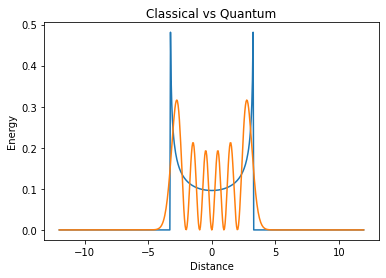

In [18]:
plt.plot(x, classical_P(x,5))
plt.plot(x, stationary_states(x,5)**2)
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.title('Classical vs Quantum')
